<a href="https://colab.research.google.com/github/sukritganesh/PytorchDemos/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Creating and Visualizing The Dataset

In [ ]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape((100, 1))

In [ ]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

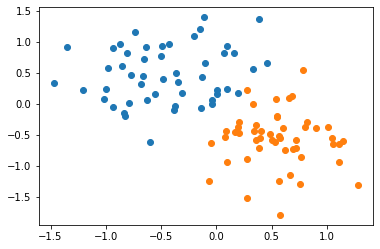

In [ ]:
scatter_plot()

# The Perceptron Model

A simple perceptron classifier. Contains only one linear layer.

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size=2, output_size=1):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    out = self.linear(x)
    out = torch.sigmoid(out)
    return out

  def predict(self, x):
    pred = self.forward(x)
    if (pred >= 0.5):
      return 1
    else:
      return 0

Creating the model, criterion and optimizer.

In [ ]:
# set manual seed for replication of initial weights
torch.manual_seed(2)

model = Model()
criterion = nn.BCELoss()
# learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

print('Initial parameters')
print(list(model.parameters()))

Initial parameters
[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


Retrieving the initial parameters (should be quite arbitrary).

In [ ]:
[w, b] =model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())
print(get_params())

(0.1622033268213272, -0.1682732254266739, 0.1939089596271515)


In [ ]:
def plot_fit(title):
  plt.title = title
  # 0 = w1x1 + w2x2 + b
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1) / (-1 * w2)
  plt.plot(x1, x2, 'r')
  scatter_plot()

We see that the line defined by the perceptron's initial parameters doesn't classify the data well. We must train the model on the data!

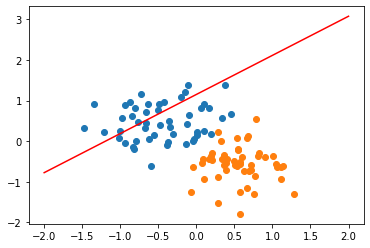

In [ ]:
plot_fit('Initial Model')

# Training the Perceptron

In [ ]:
epochs = 5000
losses = []

# Note: x_data contains data points, y_data contains labels

for i in range(epochs):
  # Feed data through model
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)

  # Calculate gradients, step
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Bookkeeping
  if (not (i + 1) % 100):
    print('Epoch:', i+1, '/', epochs, '| Loss:', loss.item())
  losses.append(loss.item())

Epoch: 100 / 5000 | Loss: 0.5297437906265259
Epoch: 200 / 5000 | Loss: 0.46398743987083435
Epoch: 300 / 5000 | Loss: 0.4145326316356659
Epoch: 400 / 5000 | Loss: 0.3762793242931366
Epoch: 500 / 5000 | Loss: 0.34591221809387207
Epoch: 600 / 5000 | Loss: 0.32124829292297363
Epoch: 700 / 5000 | Loss: 0.3008173108100891
Epoch: 800 / 5000 | Loss: 0.28360411524772644
Epoch: 900 / 5000 | Loss: 0.26888954639434814
Epoch: 1000 / 5000 | Loss: 0.2561521828174591
Epoch: 1100 / 5000 | Loss: 0.2450057566165924
Epoch: 1200 / 5000 | Loss: 0.23515863716602325
Epoch: 1300 / 5000 | Loss: 0.22638636827468872
Epoch: 1400 / 5000 | Loss: 0.21851404011249542
Epoch: 1500 / 5000 | Loss: 0.2114028036594391
Epoch: 1600 / 5000 | Loss: 0.20494142174720764
Epoch: 1700 / 5000 | Loss: 0.19903963804244995
Epoch: 1800 / 5000 | Loss: 0.19362324476242065
Epoch: 1900 / 5000 | Loss: 0.18863090872764587
Epoch: 2000 / 5000 | Loss: 0.18401144444942474
Epoch: 2100 / 5000 | Loss: 0.17972171306610107
Epoch: 2200 / 5000 | Loss: 0.

Plotting the results. Loss decreases as number of epochs increases.

Text(0.5, 0, 'Epoch')

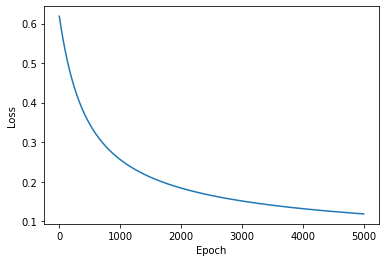

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

The trained model classifies the data quite well!

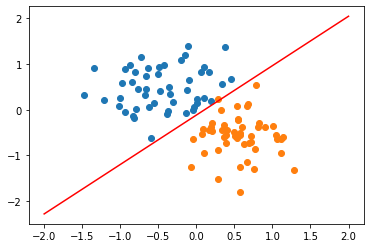

In [ ]:
plot_fit('Trained Model')

# Testing the Model

We see that the classifier correctly determines whether the points are in class 1 or 0. The classifier assigns a high probability to points which are actually in class 1 (red and green points), but assigns a low probability to the black point, which is in class 0.

Probability that given point is in class 1:

Red Point Positive Probability = 0.9963980913162231
Black Point Positive Probability = 0.001830710913054645
Green Point Positive Probability = 0.6642152070999146

Red point in class 1
Black point in class 0
Green point in class 1

Trained Model:


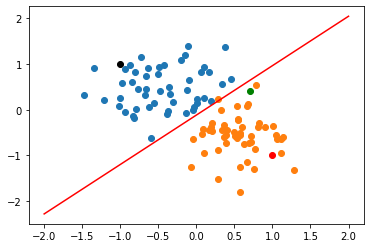

In [ ]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
point3 = torch.Tensor([0.7, 0.4])

plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')  # High probability class 1
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')  # Low probability class 1
plt.plot(point3.numpy()[0], point3.numpy()[1], 'go')   # High probability class 1

print('Probability that given point is in class 1:\n')

print('Red Point Positive Probability = {}'.format(model.forward(point1).item()))
print('Black Point Positive Probability = {}'.format(model.forward(point2).item()))
print('Green Point Positive Probability = {}'.format(model.forward(point3).item()))

print()

print('Red point in class {}'.format(model.predict(point1)))
print('Black point in class {}'.format(model.predict(point2)))
print('Green point in class {}'.format(model.predict(point3)))

print('\nTrained Model:')
plot_fit('Trained Model')